# How Corporate-nonprofit board interlocks influence corporate deviance

A couple of things to note about the analysis: <ul> <li> Corporate-nonprofit board interlocks (aka CNBIs) refers to board conections between corporations and nonprofit organizations. </li> <li> Hypothesis 2 onwards consider CNBIs constituted with different types of nonprofits or by board directors who also hold different roles. </li> <li> The Dependent variable is the occurence of negative earnings restatements that are not likely to be accidental (due to law changes, reorganizations). These restatements are typically evidence of that something is amiss </li> </ul>

In [1]:
import pandas as pd
import numpy as np
from linearmodels import PanelOLS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_stata('...dta')
data

,PermID,Year,ndv,pdv,adv,fem_real,fem_definite,fem_maybe,fem_real_990,fem_real_EZ,...,bmv12,bmv22,bmv32,book_value,bmv,ln_at,ln_revt,ln_ni,ln_emp,sic2
0,AAA001,2009,1,0,1,0,0,0,0,0,...,0.364847,0.217277,0.217277,12763.992188,0.217277,10.212809,10.048583,8.068716,4.315286,26
1,AAA001,2010,1,1,2,0,0,0,0,0,...,0.400529,0.254916,0.254916,15663.017578,0.254917,10.314139,10.190994,8.315077,4.382739,26
2,AAA001,2011,0,1,1,0,0,1,0,0,...,0.464279,0.271479,0.271479,15419.994141,0.271479,10.361419,10.295901,8.362409,4.433171,26
3,AAA001,2012,0,1,1,0,0,0,0,0,...,0.435823,0.275485,0.275485,17574.988281,0.275485,10.430462,10.305748,8.399310,4.473660,26
4,AAA005,2013,1,0,1,0,0,0,0,0,...,0.467283,0.325744,0.325744,9532.092773,0.325743,10.031260,9.068501,NaN,2.954910,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15717,P23521,2010,0,0,0,0,0,0,0,0,...,2.072735,0.686991,0.686991,661.604919,0.686995,8.102221,8.751267,4.807580,3.788702,36
15718,P23521,2011,0,0,0,0,0,0,0,0,...,3.915173,1.428727,1.428727,770.517212,1.428728,8.117901,8.795190,4.232903,3.817822,36
15719,P23521,2012,0,0,0,0,0,0,0,0,...,3.268147,1.387306,1.387306,963.782837,1.387309,8.060788,8.714951,5.194256,3.803970,36
15720,P23521,2013,0,0,0,0,0,0,0,0,...,1.638114,0.741634,0.741634,1091.565430,0.741635,8.004983,8.685606,4.373881,3.885145,36


In [3]:
df = data.copy()
df = df[['PermID', 'Year', 'ndv', 'definite_990', 'communityimp_definite', 'ceoall_definite_990', 'ceoall_comm_definite', 'chairall_definite_990', 'ln_at', 'bmv_csho', 'roa_ib', 'leverage', 'F500_ties', 'PermIDnum', 'PermIDave_age', 'ceo_chair', 'audit', 'independent', 'recid_adv']]
df.columns =['PermID', 'Year', 'ndv', 'cnbi', 'social_welfare_cnbi', 'ceo_cnbi', 'ceo_sw_cnbi', 'chairman_cnbi', 'natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']
df = df.dropna()

In [4]:
print(df['PermID'].nunique())
print(df['Year'].nunique())

1024
17


/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/1152169088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot = True, cmap = 'Blues')


<AxesSubplot: >

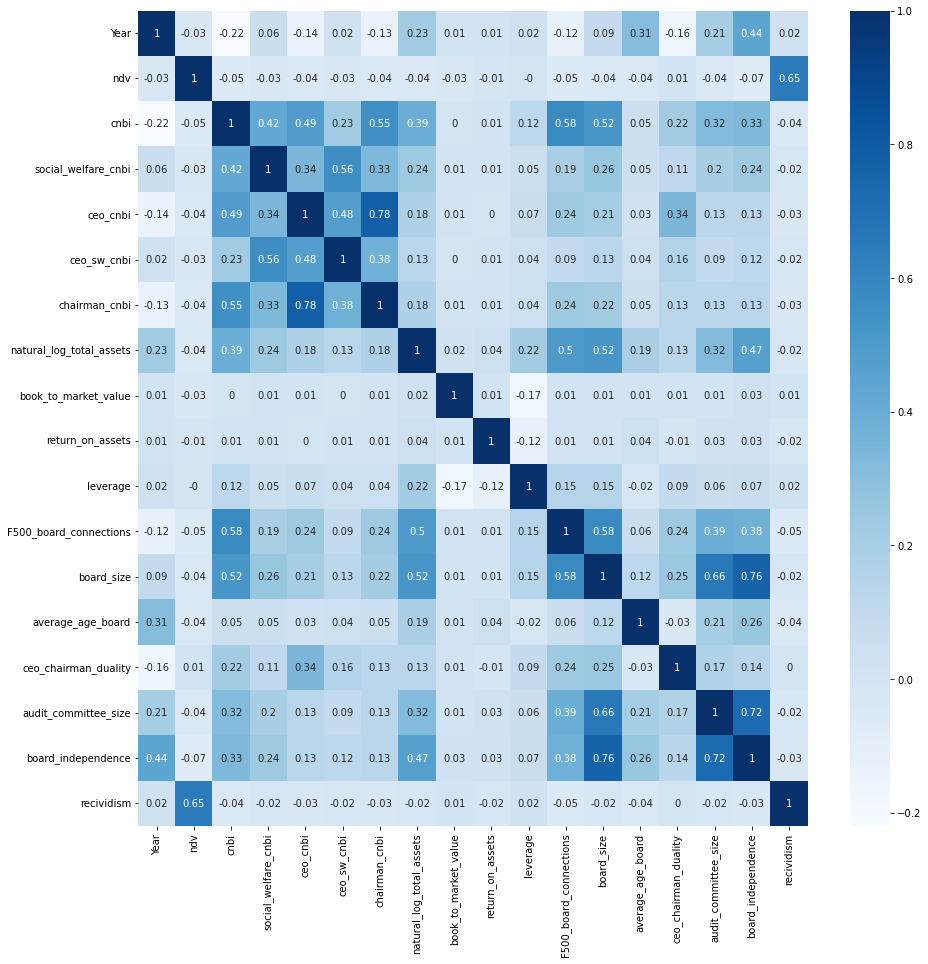

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr().round(2), annot = True, cmap = 'Blues')

Multicollinearity is not a problem in this dataset.

In [6]:
df.groupby('Year').cnbi.agg(['mean', 'std'])

,mean,std
Year,,
1998,4.002653,4.062917
1999,4.612434,4.754286
2000,4.963464,4.711459
2001,5.188755,4.829587
2002,5.559783,5.010108
2003,5.652759,4.990073
2004,5.649283,5.019109
2005,5.840617,5.165253
2006,6.022164,5.327477


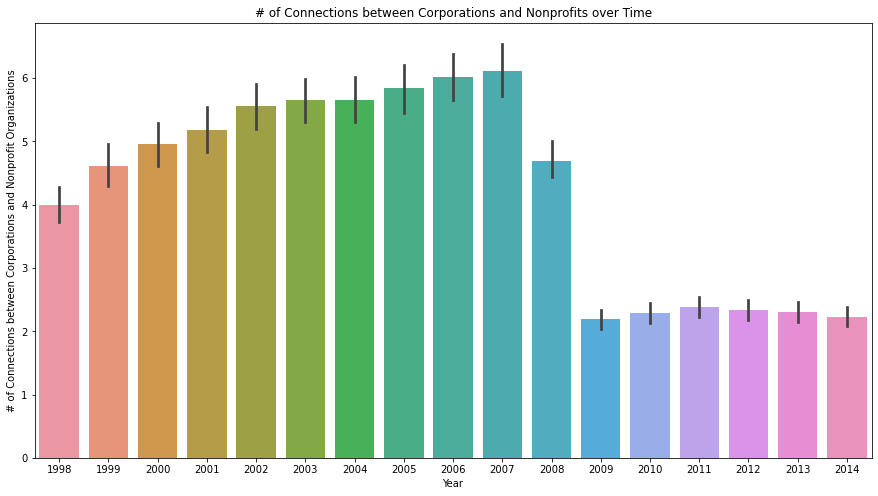

In [82]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'Year',y = 'cnbi',data = df)
plt.xlabel('Year')
plt.ylabel('# of Connections between Corporations and Nonprofit Organizations')
plt.title('# of Connections between Corporations and Nonprofits over Time')
plt.savefig('cnbi_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
df.groupby('Year').board_size.agg(['mean', 'std'])

,mean,std
Year,,
1998,8.312997,3.609441
1999,8.931217,3.777315
2000,9.457375,3.831372
2001,10.010710,3.696951
2002,10.115489,3.500667
2003,10.134590,3.282014
2004,10.194263,3.237358
2005,10.257069,3.118547
2006,10.241199,3.037704


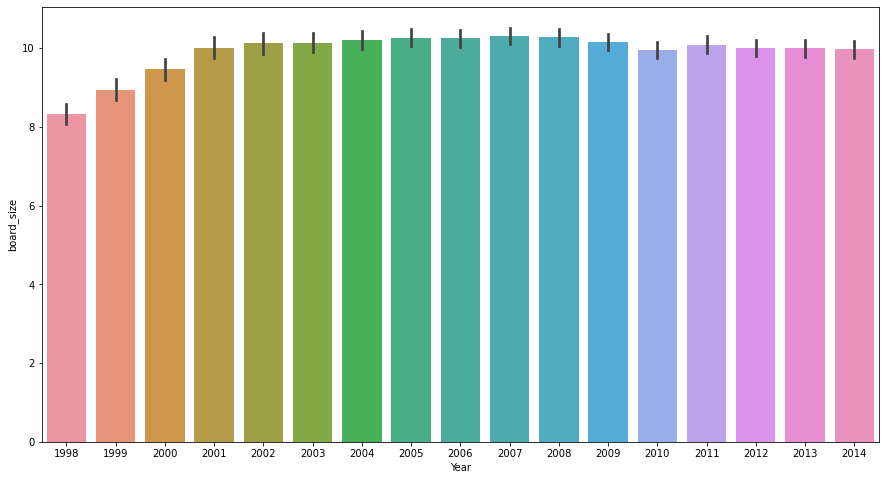

In [83]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'Year',y = 'board_size',data = df)
plt.show()

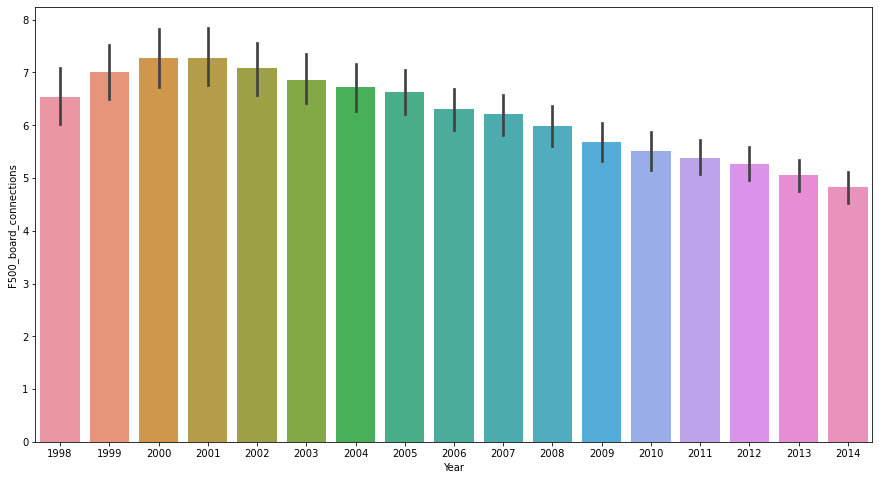

In [84]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'Year',y = 'F500_board_connections',data = df)
plt.show()

There is a substantial decrease in the number of corporate-nonprofit board connections from 2008 onwards. This cannot be attributed to changes in the board size. Nonetheless, this could be related to changes in the nonprofit tax form. Further investigation is important. <ul> <li> Notably, since the SOX Act of 2002, the number of board connections between Fortune 500 companies have steadily decreased.</li>

# H1: CNBI (baseline)

In [11]:
df1 = df[['PermID', 'Year', 'ndv', 'cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']]
df1

,PermID,Year,ndv,cnbi,natural_log_total_assets,book_to_market_value,return_on_assets,leverage,F500_board_connections,board_size,average_age_board,ceo_chairman_duality,audit_committee_size,board_independence,recividism
0,AAA001,2009,1,1,10.212809,0.217277,0.124985,0.511853,21,10,63.599998,1,5,9,0
1,AAA001,2010,1,2,10.314139,0.254917,0.149908,0.468862,21,10,64.599998,1,5,9,1
2,AAA001,2011,0,3,10.361419,0.271479,0.142028,0.498292,16,10,65.599998,1,5,9,2
3,AAA001,2012,0,2,10.430462,0.275485,0.140562,0.467470,18,11,65.909088,1,5,9,1
4,AAA005,2013,1,0,10.031260,0.325743,-0.053207,0.580342,2,16,65.312500,1,9,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15717,P23521,2010,0,0,8.102221,0.686995,0.039193,0.799624,3,10,62.299999,1,6,9,0
15718,P23521,2011,0,0,8.117901,1.428728,0.020873,0.770267,3,10,63.299999,1,6,9,0
15719,P23521,2012,0,0,8.060788,1.387309,0.053737,0.695756,3,9,64.111115,1,5,8,0
15720,P23521,2013,0,0,8.004983,0.741635,0.025049,0.635641,2,11,63.818180,1,6,10,0


In [12]:
df1.describe().round(2)

,Year,ndv,cnbi,natural_log_total_assets,book_to_market_value,return_on_assets,leverage,F500_board_connections,board_size,average_age_board,ceo_chairman_duality,audit_committee_size,board_independence,recividism
count,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00,12436.00
mean,2005.83,0.14,4.30,8.66,-1.62,0.05,0.64,6.24,9.90,60.90,0.64,5.17,7.46,0.17
std,4.85,0.41,4.41,1.56,121.76,0.26,0.22,6.04,3.23,4.43,0.48,2.18,3.33,0.46
min,1998.00,0.00,0.00,0.44,-11673.56,-17.36,0.00,0.00,1.00,25.50,0.00,0.00,0.00,0.00
25%,2002.00,0.00,1.00,7.59,0.25,0.02,0.51,2.00,8.00,58.67,0.00,4.00,5.00,0.00
50%,2006.00,0.00,3.00,8.56,0.44,0.05,0.63,5.00,10.00,61.33,1.00,5.00,8.00,0.00
75%,2010.00,0.00,6.00,9.63,0.68,0.09,0.76,9.00,12.00,63.64,1.00,6.00,10.00,0.00
max,2014.00,4.00,36.00,14.94,566.13,2.51,3.46,50.00,30.00,82.00,1.00,14.00,24.00,5.00


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12436 entries, 0 to 15721
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PermID                    12436 non-null  object 
 1   Year                      12436 non-null  int16  
 2   ndv                       12436 non-null  int8   
 3   cnbi                      12436 non-null  int16  
 4   natural_log_total_assets  12436 non-null  float32
 5   book_to_market_value      12436 non-null  float32
 6   return_on_assets          12436 non-null  float32
 7   leverage                  12436 non-null  float32
 8   F500_board_connections    12436 non-null  int16  
 9   board_size                12436 non-null  int8   
 10  average_age_board         12436 non-null  float32
 11  ceo_chairman_duality      12436 non-null  int8   
 12  audit_committee_size      12436 non-null  int8   
 13  board_independence        12436 non-null  int8   
 14  recivi

In [14]:
df1['Year'] = pd.to_datetime(df1['Year'])
df1.set_index(['PermID', 'Year'], inplace=True)

mod = PanelOLS(df1['ndv'], df1[['cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']],
               entity_effects=True)
res1 = mod.fit(cov_type='clustered', cluster_time=True)
res1

/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/3749992401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.to_datetime(df1['Year'])


Dep. Variable:,ndv,R-squared:,0.2909
Estimator:,PanelOLS,R-squared (Between):,0.6373
No. Observations:,12436,R-squared (Within):,0.2909
Date:,"Mon, Mar 20 2023",R-squared (Overall):,0.4294
Time:,11:35:37,Log-likelihood,-2146.8
Cov. Estimator:,Clustered,,
,,F-statistic:,389.76
Entities:,1024,P-value,0.0000
Avg Obs:,12.145,Distribution:,"F(12,11400)"
Min Obs:,1.0000,,
Max Obs:,17.000,F-statistic (robust):,522.45


In [15]:
def create_parameters(reg_results):
    err_series_reg_results = (reg_results.conf_int().iloc[:,1]-reg_results.conf_int().iloc[:,0])/2
    
    reg_results_df = pd.DataFrame({'varname': err_series_reg_results.index.values,
                                   'coef': reg_results.params,
                                   'err': err_series_reg_results.values
                       })
    reg_results_df = reg_results_df.reset_index(drop=True)
    return(reg_results_df)

In [16]:
reg_results1 = create_parameters(res1)
reg_results1

,varname,coef,err
0,cnbi,-0.002047,0.002254
1,natural_log_total_assets,0.009680,0.012148
2,book_to_market_value,-0.000137,0.000070
3,return_on_assets,0.007442,0.008957
4,leverage,-0.085108,0.036776
5,F500_board_connections,-0.000249,0.001208
6,board_size,0.008411,0.003823
7,average_age_board,-0.000952,0.002149
8,ceo_chairman_duality,0.027978,0.013644
9,audit_committee_size,0.004646,0.005081


# H2: Social Welfare Oriented CNBI

Social welfare oriented nonprofit organizations are nonprofits which are oriented towards beneficiaries who are disadvantaged and have bearing on causes such as homelessness, civil rights, mental illness and food security. This is distinct from elite oriented nonprofits such as museums, galleries and cultural centers. (Marquis et al. 2013)

In [17]:
df['non_sw_cnbi'] = df['cnbi'] - df['social_welfare_cnbi']

In [18]:
df2 = df[['PermID', 'Year', 'ndv', 'social_welfare_cnbi','non_sw_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']]

In [19]:
df2['Year'] = pd.to_datetime(df2['Year'])
df2.set_index(['PermID', 'Year'], inplace=True)

mod2 = PanelOLS(df2['ndv'], df2[['social_welfare_cnbi','non_sw_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']],
               entity_effects=True)
res2 = mod2.fit(cov_type='clustered', cluster_time=True)
res2

/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/2826273406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.to_datetime(df2['Year'])


Dep. Variable:,ndv,R-squared:,0.2909
Estimator:,PanelOLS,R-squared (Between):,0.6415
No. Observations:,12436,R-squared (Within):,0.2909
Date:,"Mon, Mar 20 2023",R-squared (Overall):,0.4312
Time:,11:35:39,Log-likelihood,-2146.6
Cov. Estimator:,Clustered,,
,,F-statistic:,359.78
Entities:,1024,P-value,0.0000
Avg Obs:,12.145,Distribution:,"F(13,11399)"
Min Obs:,1.0000,,
Max Obs:,17.000,F-statistic (robust):,469.84


In [20]:
reg_results2 = create_parameters(res2)
reg_results2

,varname,coef,err
0,social_welfare_cnbi,-0.004830,0.008948
1,non_sw_cnbi,-0.001811,0.002055
2,natural_log_total_assets,0.009858,0.012126
3,book_to_market_value,-0.000137,0.000070
4,return_on_assets,0.007437,0.008976
5,leverage,-0.084909,0.036782
6,F500_board_connections,-0.000308,0.001251
7,board_size,0.008318,0.003820
8,average_age_board,-0.000949,0.002146
9,ceo_chairman_duality,0.028091,0.013779


# H3: CEO CNBI

Corporate-nonprofit board interlocks held by CEOs who are also board members

In [21]:
df['non_ceo_cnbi'] = df.apply(lambda x: x['cnbi'] - x['ceo_cnbi'] if x['ceo_chairman_duality']==1 else x['cnbi'], axis=1)

In [22]:
df3 = df[['PermID', 'Year', 'ndv','ceo_cnbi', 'non_ceo_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']]

In [23]:
df3['Year'] = pd.to_datetime(df3['Year'])
df3.set_index(['PermID', 'Year'], inplace=True)

mod3 = PanelOLS(df3['ndv'], df3[['ceo_cnbi', 'non_ceo_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']],
               entity_effects=True)
res3 = mod3.fit(cov_type='clustered', cluster_time=True)
res3

/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/1764596907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = pd.to_datetime(df3['Year'])


Dep. Variable:,ndv,R-squared:,0.2916
Estimator:,PanelOLS,R-squared (Between):,0.6522
No. Observations:,12436,R-squared (Within):,0.2916
Date:,"Mon, Mar 20 2023",R-squared (Overall):,0.4364
Time:,11:35:41,Log-likelihood,-2140.4
Cov. Estimator:,Clustered,,
,,F-statistic:,361.02
Entities:,1024,P-value,0.0000
Avg Obs:,12.145,Distribution:,"F(13,11399)"
Min Obs:,1.0000,,
Max Obs:,17.000,F-statistic (robust):,655.27


In [24]:
reg_results3 = create_parameters(res3)
reg_results3

,varname,coef,err
0,ceo_cnbi,-0.017073,0.007275
1,non_ceo_cnbi,-0.000466,0.002269
2,natural_log_total_assets,0.010286,0.012215
3,book_to_market_value,-0.000137,0.000069
4,return_on_assets,0.007289,0.008927
5,leverage,-0.084922,0.036965
6,F500_board_connections,-0.000482,0.001228
7,board_size,0.008098,0.003804
8,average_age_board,-0.000909,0.002132
9,ceo_chairman_duality,0.035739,0.013575


# H4: CEO Social Welfare Oriented CNBI

In [25]:
df['ceo_non_sw_cnbi'] = df['ceo_cnbi'] - df['ceo_sw_cnbi']
df['ceo_non_sw_cnbi'].value_counts()

0    9584
1    1892
2     688
3     195
4      60
5       8
6       6
7       2
8       1
Name: ceo_non_sw_cnbi, dtype: int64

In [26]:
df4 = df[['PermID', 'Year', 'ndv','ceo_sw_cnbi', 'ceo_non_sw_cnbi', 'non_ceo_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']]

In [27]:
df4['Year'] = pd.to_datetime(df4['Year'])
df4.set_index(['PermID', 'Year'], inplace=True)

mod4 = PanelOLS(df4['ndv'], df4[['ceo_sw_cnbi', 'ceo_non_sw_cnbi', 'non_ceo_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']],
               entity_effects=True)
res4 = mod4.fit(cov_type='clustered', cluster_time=True)
res4

/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/696046704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Year'] = pd.to_datetime(df4['Year'])


Dep. Variable:,ndv,R-squared:,0.2917
Estimator:,PanelOLS,R-squared (Between):,0.6524
No. Observations:,12436,R-squared (Within):,0.2917
Date:,"Mon, Mar 20 2023",R-squared (Overall):,0.4364
Time:,11:35:43,Log-likelihood,-2140.3
Cov. Estimator:,Clustered,,
,,F-statistic:,335.21
Entities:,1024,P-value,0.0000
Avg Obs:,12.145,Distribution:,"F(14,11398)"
Min Obs:,1.0000,,
Max Obs:,17.000,F-statistic (robust):,607.80


In [28]:
reg_results4 = create_parameters(res4)
reg_results4

,varname,coef,err
0,ceo_sw_cnbi,-0.017680,0.011169
1,ceo_non_sw_cnbi,-0.017075,0.008836
2,non_ceo_cnbi,-0.000463,0.002260
3,natural_log_total_assets,0.010283,0.012219
4,book_to_market_value,-0.000137,0.000069
5,return_on_assets,0.007291,0.008931
6,leverage,-0.084892,0.036959
7,F500_board_connections,-0.000485,0.001213
8,board_size,0.008096,0.003810
9,average_age_board,-0.000908,0.002126


# H5: Chairman CNBI

In [29]:
df['non_chairman_cnbi'] = df['cnbi'] - df['chairman_cnbi']

In [30]:
df5 = df[['PermID', 'Year', 'ndv','chairman_cnbi','non_chairman_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']]

In [31]:
df5['Year'] = pd.to_datetime(df5['Year'])
df5.set_index(['PermID', 'Year'], inplace=True)

mod5 = PanelOLS(df5['ndv'], df5[['chairman_cnbi','non_chairman_cnbi','natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']],
               entity_effects=True)
res5 = mod5.fit(cov_type='clustered', cluster_time=True)
res5

/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/818866695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Year'] = pd.to_datetime(df5['Year'])


Dep. Variable:,ndv,R-squared:,0.2916
Estimator:,PanelOLS,R-squared (Between):,0.6376
No. Observations:,12436,R-squared (Within):,0.2916
Date:,"Mon, Mar 20 2023",R-squared (Overall):,0.4301
Time:,11:35:45,Log-likelihood,-2140.8
Cov. Estimator:,Clustered,,
,,F-statistic:,360.94
Entities:,1024,P-value,0.0000
Avg Obs:,12.145,Distribution:,"F(13,11399)"
Min Obs:,1.0000,,
Max Obs:,17.000,F-statistic (robust):,528.53


In [32]:
reg_results5 = create_parameters(res5)
reg_results5

,varname,coef,err
0,chairman_cnbi,-0.014293,0.006821
1,non_chairman_cnbi,-0.000128,0.002422
2,natural_log_total_assets,0.009957,0.012257
3,book_to_market_value,-0.000137,0.000069
4,return_on_assets,0.007198,0.008867
5,leverage,-0.085796,0.036868
6,F500_board_connections,-0.000503,0.001242
7,board_size,0.008192,0.003789
8,average_age_board,-0.000919,0.002125
9,ceo_chairman_duality,0.029383,0.013801


# Visualizing the coefficients

In [68]:
coef_dfA = pd.concat([reg_results1, reg_results2, reg_results3, reg_results4, reg_results5], axis=0)
coef_dfA

,varname,coef,err
0,cnbi,-0.002047,0.002254
1,natural_log_total_assets,0.009680,0.012148
2,book_to_market_value,-0.000137,0.000070
3,return_on_assets,0.007442,0.008957
4,leverage,-0.085108,0.036776
...,...,...,...
8,average_age_board,-0.000919,0.002125
9,ceo_chairman_duality,0.029383,0.013801
10,audit_committee_size,0.004588,0.005067
11,board_independence,-0.016428,0.006008


In [69]:
control_var = ['natural_log_total_assets', 'book_to_market_value', 'return_on_assets', 'leverage', 'F500_board_connections', 'board_size', 'average_age_board', 'ceo_chairman_duality', 'audit_committee_size', 'board_independence', 'recividism']

In [70]:
coef_dfA = coef_dfA[coef_dfA.varname.isin(control_var) == False]
coef_dfA = coef_dfA.reset_index(drop=True)
coef_dfA = coef_dfA.drop_duplicates(keep='first', inplace=False)
coef_dfA

,varname,coef,err
0,cnbi,-0.002047,0.002254
1,social_welfare_cnbi,-0.004830,0.008948
2,non_sw_cnbi,-0.001811,0.002055
3,ceo_cnbi,-0.017073,0.007275
4,non_ceo_cnbi,-0.000466,0.002269
5,ceo_sw_cnbi,-0.017680,0.011169
6,ceo_non_sw_cnbi,-0.017075,0.008836
7,non_ceo_cnbi,-0.000463,0.002260
8,chairman_cnbi,-0.014293,0.006821
9,non_chairman_cnbi,-0.000128,0.002422


/var/folders/4y/0wxp7_r91gvbpm575jcw_89m0000gn/T/ipykernel_10677/2450896402.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_dfB.shape[0]),


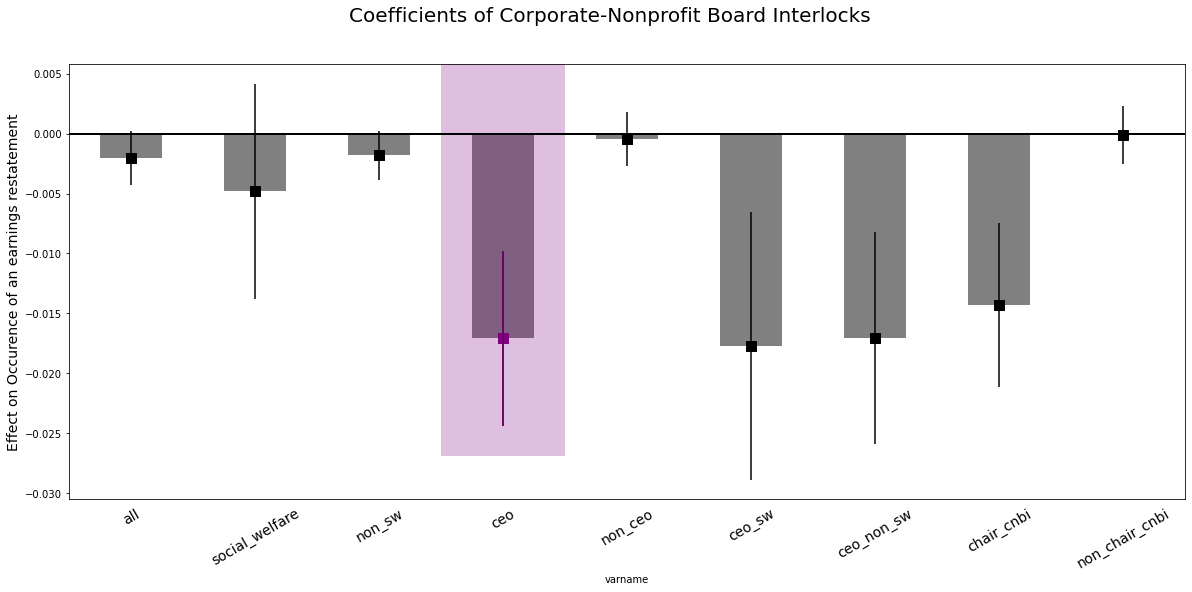

In [85]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.suptitle('Coefficients of Corporate-Nonprofit Board Interlocks', fontsize=20)

ax.set_ylabel('Effect on Occurence of an earnings restatement', fontsize=14)
ax.set_xlabel('variable')

coef_dfA.plot(x='varname', y='coef', kind='bar', 
                ax=ax, color='grey', 
                yerr='err', legend=False)

ax.scatter(x=pd.np.arange(coef_dfA.shape[0]), 
            marker='s', s=120, 
            y=coef_dfA['coef'], color='black')
        
ax.scatter(x=3, y=coef_dfA['coef'][3], color="purple", marker='s', s= 120)

plt.vlines(x = 3, ymin = -0.024347, ymax = -0.009798, colors = 'purple')

plt.axvspan(2.5, 3.5, ymin = 0.1, ymax = 1, facecolor = 'purple', alpha = 0.25)

ax.axhline(y=0, linestyle='-', color='black', linewidth=2)

ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['all', 'social_welfare', 'non_sw', 'ceo', 'non_ceo', 'ceo_sw','ceo_non_sw', 'chair_cnbi', 'non_chair_cnbi'], 
                           rotation=30, fontsize=14)

plt.savefig('coefficients_from_regression.png', dpi=300, bbox_inches='tight')

In [40]:
res3.conf_int()

,lower,upper
ceo_cnbi,-0.024347,-0.009798
non_ceo_cnbi,-0.002736,0.001803
natural_log_total_assets,-0.001929,0.022500
book_to_market_value,-0.000206,-0.000067
return_on_assets,-0.001638,0.016216
leverage,-0.121888,-0.047957
F500_board_connections,-0.001710,0.000746
board_size,0.004295,0.011902
average_age_board,-0.003041,0.001223
ceo_chairman_duality,0.022164,0.049313


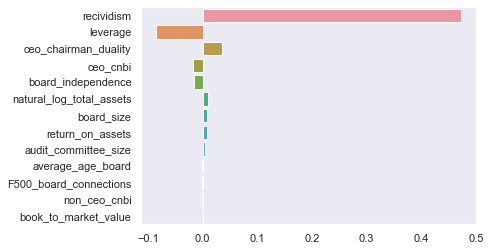

In [41]:
coeff3 = res3.params
coeff3 = coeff3.iloc[(coeff3.abs()*-1.0).argsort()]
sns.barplot(x=coeff3.values, y=coeff3.index, orient='h');

# Making sense of the findings

The most important finding: CNBI have a negative effect on the occurence of earnings restatements when they are held by the CEO . <ul> <li> In general, CNBI has a negative effect on the occurrence of earnings restatements. Notably, although this finding has a p-value of 0.752 (not great), its 95% CI is highly negatively skewed which provides evidence that it has a negative effect. </li> <li> CNBI with social welfare nonprofits don't have a distinct effect from those that are NOT SW nonprofits (Note that they both have negative effects) </li> <li> Being held by an individual in a consequential position (Chairman) increases the effect of the CNBI on earnings restatements as well. </li><li> Overall, having a track record of engaging in deviant behavior is much a strong predictor of engaging in such actions in the future. </li></ul>